In [2]:
%pylab notebook
import glob
import matplotlib.pyplot as plt
import math
from netCDF4 import Dataset
import os
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [46]:
#%cd /projects/PMESDR/vagrant/NSIDCtest/vmwintryhummock
%cd /projects/brodzik/

/projects/brodzik


In [70]:
yyyyddd = 2005333
oldList = sorted(glob.glob("v1.2/%s/*EASE2_N*%s*nc" % (yyyyddd, yyyyddd)))
newList = sorted(glob.glob("v1.3afterlogicfix/%s/*EASE2_N*%s*nc" % (yyyyddd, yyyyddd)))
print('\n'.join(oldList))
print("")
print('\n'.join(newList))

v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-19H-E-GRD-CSU-v1.2.nc
v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-19H-M-GRD-CSU-v1.2.nc
v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-19V-E-GRD-CSU-v1.2.nc
v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-19V-M-GRD-CSU-v1.2.nc
v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-22V-E-GRD-CSU-v1.2.nc
v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-22V-M-GRD-CSU-v1.2.nc
v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-37H-E-GRD-CSU-v1.2.nc
v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-37H-M-GRD-CSU-v1.2.nc
v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-37V-E-GRD-CSU-v1.2.nc
v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-37V-M-GRD-CSU-v1.2.nc
v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-91H-E-GRD-CSU-v1.2.nc
v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-91H-M-GRD-CSU-v1.2.nc
v1.2/2005333/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005333-91V-E-GRD-CSU-v1.2.nc
v1.2/2005333

In [12]:
def read_cetb(file, varname="TB"):
    fid = Dataset(file, 'r', format='NETCDF4')
    data = np.squeeze(fid.variables[varname][:])
    fid.close()
    print(file)
    print(np.shape(data))
    print(np.amin(data), np.amax(data))
    return(data)   

In [68]:
def show_both(file1, file2, varname="TB", portrait=False):
    img1 = read_cetb(file1,varname=varname)
    img2 = read_cetb(file2,varname=varname)
    
    if portrait:
        fig, ax = plt.subplots(2, 1, figsize=(9.5,9))
    else:
        fig, ax = plt.subplots(1, 2, figsize=(10,6))
    
    if varname == "TB":
        ax[0].imshow(img1, cmap=plt.cm.gray, interpolation='None', vmin=50., vmax=300.)
    else: # assume TB_TIME
        ax[0].imshow(img1, cmap=plt.cm.gray, interpolation='None', vmin=0., vmax=1440.)
    ax[0].set_title('v1.2')
    ax[0].axis('off')
    if varname == "TB":
        ax[1].imshow(img2, cmap=plt.cm.gray, interpolation='None', vmin=50., vmax=300.)
    else:
        ax[1].imshow(img2, cmap=plt.cm.gray, interpolation='None', vmin=0., vmax=1440.)
    ax[1].set_title('v1.3')
    ax[1].axis('off')
    
    fileName = os.path.basename(file1)
    fig.suptitle(fileName)
    fig.tight_layout()
    fig.savefig("%s.both.png" % fileName)
    return(fig)

v1.2/2005333/NSIDC-0630-EASE2_N3.125km-F16_SSMIS-2005333-37H-M-SIR-CSU-v1.2.nc
(5760, 5760)
91.05 337.66
v1.3afterlogicfix/2005333/NSIDC-0630-EASE2_N3.125km-F16_SSMIS-2005333-37H-M-SIR-CSU-v1.3.nc
(5760, 5760)
91.05 337.66


<IPython.core.display.Javascript object>


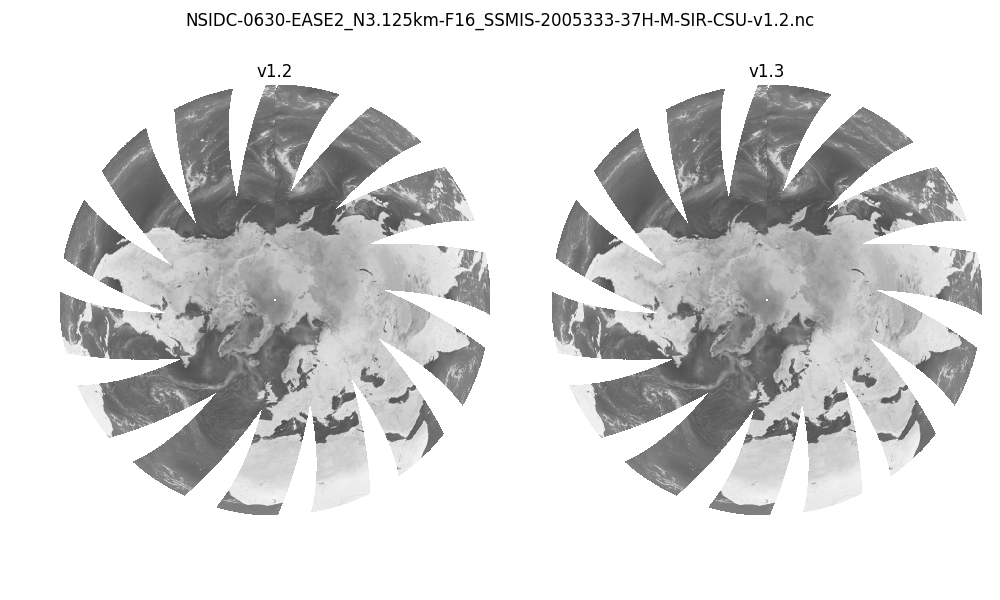

In [74]:
varname = "TB"
old_file_index = 14+1
new_file_index = 2+1
fig = show_both(oldList[old_file_index], newList[new_file_index], varname=varname, portrait=False)

In [63]:
def show_diff(file1, file2, varname="TB"):
    img1 = read_cetb(file1,varname=varname)
    img2 = read_cetb(file2,varname=varname)
    
    diff = img2 - img1

    rows, cols = np.shape(diff)
    print("%s - %s" % (file2, file2))
    print(np.shape(diff))
    print(np.amin(diff), np.amax(diff))
    
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    im = ax.imshow(diff, cmap=plt.cm.BrBG, interpolation='None', vmin=-1., vmax=1.)
    ax.set_title('v1.3 - v1.2')
    ax.axis('off')
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    fileName = os.path.basename(file1)
    fig.suptitle(fileName)
    fig.tight_layout()
    fig.savefig("%s.diff.png" % fileName)
    
    diff[ diff==0 ] = np.nan
    
    sigdiffs = diff[np.isnan(diff) == False]
    num_diffs = np.shape(sigdiffs)[0]
    print("The number of non-zero pixels is %s" % num_diffs)
    
    print("This represents                  %.3f %% of the pixels in the image" % (
        100. * np.float(num_diffs) / np.float( rows * cols ) ))
    print("The non-zero pixel values are:")
    print(sigdiffs)
    
    return(fig)

v1.2/2005333/NSIDC-0630-EASE2_N3.125km-F16_SSMIS-2005333-37H-M-SIR-CSU-v1.2.nc
(5760, 5760)
91.05 337.66
v1.3afterlogicfix/2005333/NSIDC-0630-EASE2_N3.125km-F16_SSMIS-2005333-37H-M-SIR-CSU-v1.3.nc
(5760, 5760)
91.05 337.66
v1.3afterlogicfix/2005333/NSIDC-0630-EASE2_N3.125km-F16_SSMIS-2005333-37H-M-SIR-CSU-v1.3.nc - v1.3afterlogicfix/2005333/NSIDC-0630-EASE2_N3.125km-F16_SSMIS-2005333-37H-M-SIR-CSU-v1.3.nc
(5760, 5760)
0.0 0.0


<IPython.core.display.Javascript object>


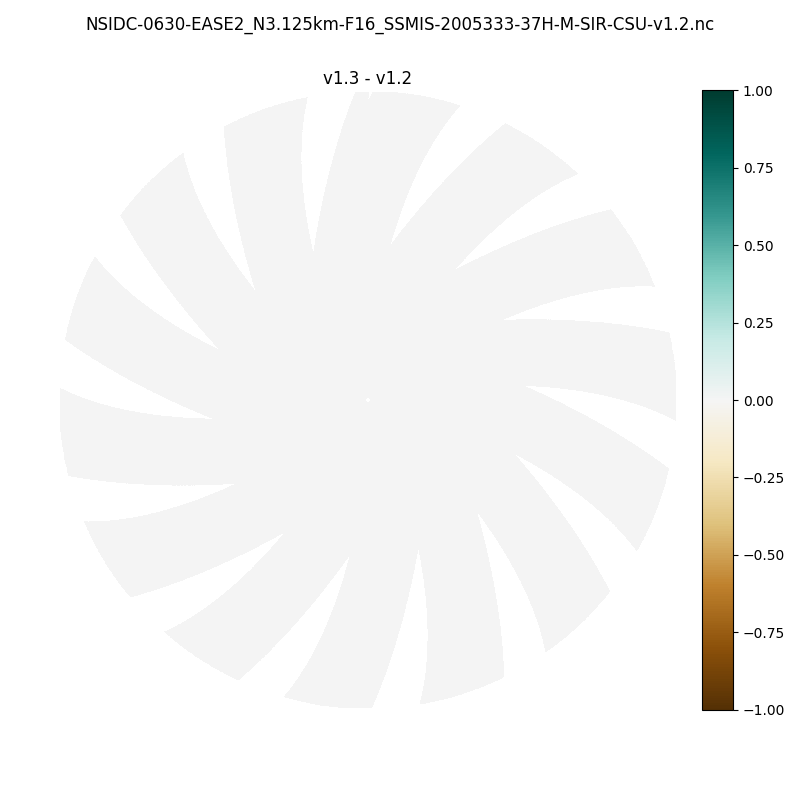

The number of non-zero pixels is 0
This represents                  0.000 % of the pixels in the image
The non-zero pixel values are:
[]


In [75]:
fig = show_diff(oldList[old_file_index], newList[new_file_index], varname="TB")

In [60]:
fig.savefig("%s.diff.png" % os.path.basename(newList[new_file_index]))

In [ ]:
x = np.array([1., 2., 0.])
x

In [ ]:
x[ x == 0 ] = np.nan
x

In [ ]:
~np.isnan(x)

In [ ]:
np.count_nonzero(~np.isnan(x))


In [ ]:
x[np.isnan(x) == False]

In [ ]:
test = np.array([[1,2],[3,4]])
test


In [ ]:
test.flatten()

In [ ]:
np.float( 2 )

In [ ]:
24*60*60/2



In [ ]:
23*60

In [ ]:
%cd /projects/brodzik/CSU
%ls

In [ ]:
file = 'CSU_SSMIS_FCDR_V01R00_F16_D20051129_S2310_E0052_R10924.nc'
fid = Dataset(file, 'r', format='NETCDF4')

In [ ]:
fid.close()

In [ ]:
file = 'GSX_CSU_SSMIS_FCDR_V01R00_F16_D20051129_S2310_E0052_R10924.nc'
fid = Dataset(file, 'r', format='NETCDF4')

In [ ]:
fid